In [7]:
import pandas as pd
yoy_dir = "~/Projects/strategy-evaluator/output/yoy"
algorithm = "triple-bottom"

In [8]:
df = pd.read_csv(f"{yoy_dir}/yoy_{algorithm}.csv", delimiter=',', index_col=0)
df = df.sort_values(by='year') # sort from least recent to most recent year
df = df.drop(df.index[-1]) # current year is not complete
display(df)

,performance,ups,downs,limits
year,,,,
1962,0.794118,54,14,58
1963,0.690909,76,34,197
1964,0.710744,86,35,220
1965,0.562162,104,81,175
1966,0.741935,46,16,43
...,...,...,...,...
2018,0.523519,2148,1955,1883
2019,0.536800,2013,1737,2559
2020,0.541147,1302,1104,685


In [9]:
df_pruned = df.loc[df.index > 1980]
display(df_pruned)

,performance,ups,downs,limits
year,,,,
1981,0.526316,240,216,115
1982,0.655844,303,159,74
1983,0.648107,291,158,138
1984,0.529680,348,309,272
1985,0.604167,667,437,651
1986,0.564366,605,467,447
1987,0.479781,439,476,308
1988,0.613567,805,507,718
1989,0.606682,1035,671,981


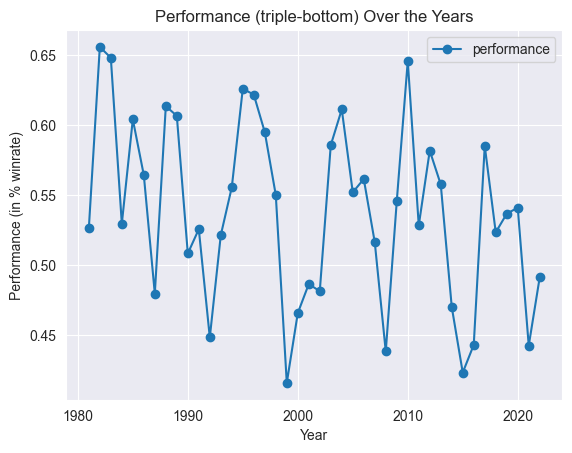

In [10]:
import matplotlib.pyplot as plt

# Plot the performance column against the year column
df_pruned.plot(y='performance', marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Performance (in % winrate)')
plt.title(f'Performance ({algorithm}) Over the Years')

# Show the plot
plt.show()

In [11]:
import numpy as np
from scipy import stats
years = np.array(df_pruned.index)
values = np.array(df_pruned["performance"].values)

slope, intercept, r_value, p_value, std_err = stats.linregress(years, values)

print("Triple Bottom YoY")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (correlation coefficient): {r_value:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard error: {std_err:.4f}")

Triple Bottom YoY
Slope: -0.0018
Intercept: 4.0789
R-value (correlation coefficient): -0.3351
P-value: 0.0301
Standard error: 0.0008


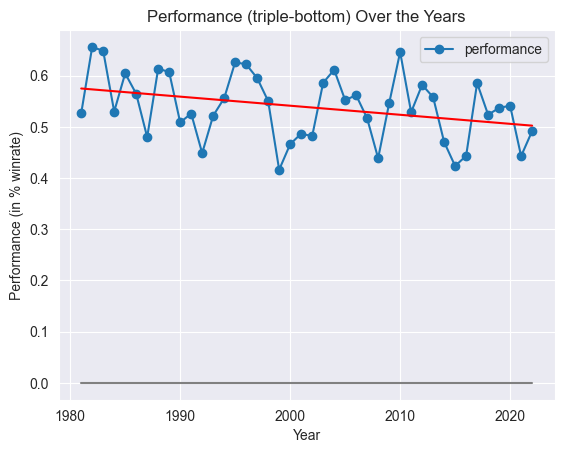

In [12]:
# Plot the DataFrame
df_pruned.plot(y='performance', marker='o')
plt.xlabel('Year')
plt.ylabel('Performance (in % winrate)')
plt.title(f'Performance ({algorithm}) Over the Years')

# Plot the regression line
regression_line = slope * years + intercept
plt.plot(years, regression_line, color='red')
plt.plot(years, 0*years, color='gray')
plt.savefig(f"./figures/yoy_perf_{algorithm}.svg", format="svg")

# Display the plot
plt.show()